In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import random
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['GSE58606_data.csv']


In [2]:
data= pd.read_csv("../input/GSE58606_data.csv")

In [3]:
data.head()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
0,6.877643,8.080215,6.245265,6.304782,6.686064,7.805950,6.814781,7.146955,6.170680,6.129586,6.066726,6.388132,7.342590,6.948283,6.804291,7.629376,6.913012,6.273561,6.678697,8.481651,8.403245,6.869585,6.651631,6.397065,7.686251,8.503795,6.804291,6.562590,6.255048,6.718919,6.930538,6.964519,6.472373,6.170680,6.870602,6.923831,6.816130,6.725680,6.833408,6.752738,...,10.81652,8.628912,6.232049,6.362097,7.107346,12.17135,8.543473,5.976584,5.927569,5.838468,7.173079,5.993228,5.934734,7.757628,6.128846,6.740838,5.825279,8.390096,7.052595,5.931828,6.222616,6.251777,11.139370,6.688105,6.323629,5.895089,7.745477,6.838267,8.196471,5.970980,7.176684,7.724408,6.035476,6.255048,6.572019,6.251777,5.873303,6.362097,1,primary breast cancer
1,6.544287,6.882722,5.874236,6.324987,6.638048,6.946567,6.488574,6.690773,6.160272,6.104929,5.993884,6.343667,7.023563,6.882455,6.423282,7.443558,6.889727,6.432146,6.531267,7.012543,6.767825,6.267960,6.622280,6.234183,7.993758,7.021625,6.748197,6.525687,6.173404,6.768250,6.801036,6.650084,6.606421,6.297480,6.641539,6.436401,6.429708,6.677894,6.642552,6.743227,...,10.75519,7.647449,6.155113,6.726412,7.946701,12.10954,8.873806,5.908219,5.993884,5.856222,7.040372,5.882980,6.037536,7.473577,6.259403,6.875405,5.839431,8.697745,7.263291,5.898383,6.338860,6.239186,11.370660,6.649936,6.315693,6.048188,7.302015,6.930931,7.063283,5.893273,7.249094,7.308890,6.021796,6.902473,6.347183,6.625569,6.004899,6.560329,1,primary breast cancer
2,6.879713,6.885387,5.958748,6.317687,6.664956,7.266728,6.965078,6.969818,6.226957,6.124874,6.047263,6.426034,7.145162,6.931897,6.527144,7.723612,7.050233,6.199073,6.616119,8.597740,7.243027,6.561458,6.650517,6.337134,7.912604,7.943729,6.812545,6.619122,6.213217,6.696660,6.808224,7.018239,6.784173,6.169629,6.926832,6.407558,6.694132,6.693352,6.818112,6.797510,...,11.20129,7.709957,6.177460,6.488069,7.669796,12.20528,8.961411,5.965072,5.922871,5.857916,7.086570,5.916390,5.965096,7.265471,6.102065,6.903061,5.845847,8.747934,7.162290,5.916390,6.191604,6.177460,10.870070,6.742175,6.273431,5.953620,7.600298,6.821186,7.689806,5.965072,7.404104,7.466418,5.977962,6.484571,6.259788

In [4]:
data=data.dropna(axis=0, how='any')
data.shape

(133, 1928)

In [5]:
assert data.target.notnull().all()
#returns nothing it means we don't have any nan values.

In [6]:
data.groupby("target_actual").count()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169372 : hsa-miR-5011-3p,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target
target_actual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
normal breast tissue,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
primary breast cancer,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122


In [7]:
data.groupby("target").count()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169372 : hsa-miR-5011-3p,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target_actual
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122


### Feature Selection:

In [45]:
correlations= data.corr()
correlations = correlations["target"].sort_values(ascending=False)

In [50]:
corr_many= correlations[correlations >0.5]
corr_many

target                  1.000000
46361 : hsa-miR-1278    0.539459
Name: target, dtype: float64

In [49]:
corr_few= correlations[(correlations >0.10) & (correlations < 0.11)]
corr_few

168789 : hsa-miR-4686         0.109985
168704 : hsa-miR-506-5p       0.109844
147613 : hsa-miR-3145-3p      0.109687
10923 : hsa-miR-107           0.109568
148652 : hsa-miR-620          0.109554
42584 : hsa-miR-432-3p        0.109122
169130 : hsa-miR-4764-3p      0.109119
148625 : hsa-miR-941          0.108832
147334 : hsa-miR-3613-5p      0.108744
146196 : hsa-miR-711          0.108265
169307 : hsa-miR-4685-3p      0.108126
148590 : hsa-miR-3919         0.107977
168601 : hsa-miR-146b-3p      0.107766
148430 : hsa-miR-374c-5p      0.107016
169369 : hsa-miR-4490         0.106945
146010 : hsa-miR-2116-5p      0.106454
11037 : hsa-miR-299-3p        0.106386
168671 : hsa-miR-3140-5p      0.105361
146112 : hsa-miR-30b-5p       0.105062
46440 : hsa-miR-1287          0.105040
169172 : hsa-miR-4445-3p      0.104957
42493 : hsa-miR-892b          0.104584
11024 : hsa-miR-223-3p        0.104370
46414 : hsa-miR-548h-5p       0.103401
168753 : hsa-miR-4741         0.103363
168680 : hsa-miR-378f    

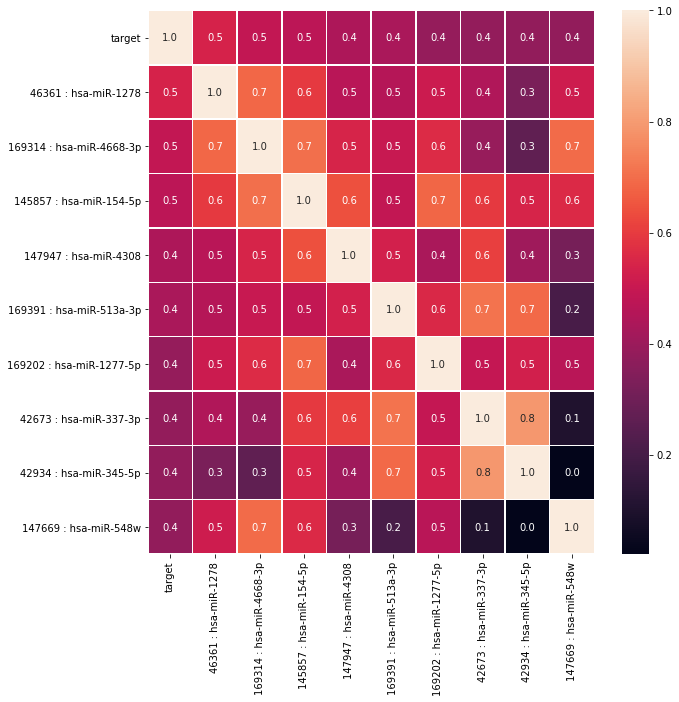

In [57]:
features= correlations.index[0:10]
f,ax= plt.subplots(figsize=(10,10))
sns.heatmap(data.loc[:,features].corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

[0.         0.00495529 0.         ... 0.         0.         0.        ]


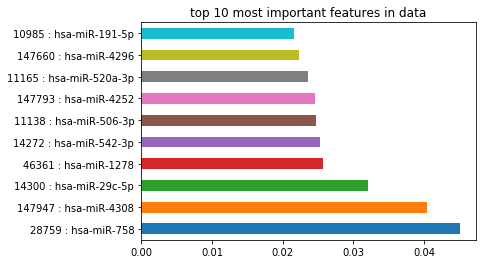

In [9]:
#Data for Analysis
feature =data[data.columns[0:1926]] #independent columns
target=data.iloc[:,1926] #target column i.e success

model = ExtraTreesClassifier()
model.fit(feature,target)
print(model.feature_importances_) #use inbuilt class 

feat_importances = pd.Series(model.feature_importances_, index=feature.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top 10 most important features in data")
plt.show()

## Compare to Normal and Cancer Tissues

In [10]:
## Normal Breast Tissue
normal= data[data.target==0]
normal

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target,target_actual
7,6.871355,7.282716,6.594995,6.631758,6.974438,7.682559,6.909911,6.950120,6.309812,6.317177,6.023938,6.663795,7.096263,6.727767,7.029936,8.040648,6.835738,6.056171,6.926089,7.258879,7.171817,6.458254,7.651103,6.533422,7.708270,6.926831,6.533149,6.135118,6.445947,6.549634,6.283679,6.554927,6.098776,6.496007,7.166166,6.718390,6.573863,6.583111,6.416675,7.133918,...,11.26519,8.439194,6.075528,6.216362,6.504704,11.35735,7.957190,5.946077,5.906097,5.817309,6.793087,5.912898,6.028542,6.255779,5.962337,6.008982,5.744979,7.613091,6.182530,5.999388,6.008982,6.076175,11.76298,6.516790,6.252498,5.821368,7.581031,6.562567,8.414320,5.897537,6.495668,7.022045,5.997490,5.826928,6.243042,6.028338,5.834648,6.265779,0,normal breast tissue
8,7.167071,7.950224,6.771967,6.616591,7.266409,7.532681,7.363235,7.076433,6.616557,6.349398,6.197506,6.520826,7.301900,7.019894,7.309888,8.397292,6.877772,6.126528,6.981957,7.310884,7.067137,6.434460,7.514670,6.677444,7.311270,7.574192,6.554523,6.453278,6.729089,6.618908,6.596198,6.890635,6.480086,6.425133,7.035267,6.877109,6.761319,6.668207,6.404914,7.209087,...,11.12161,8.983835,6.320855,6.230925,6.415711,10.93006,7.617931,5.879358,6.006487,5.910407,6.805105,5.963984,5.840487,6.227488,6.129345,5.887798,5.779757,7.337784,6.125624,6.095985,5.974403,6.349329,10.65640,6.571598,6.364992,5.765579,8.095558,6.607894,9.253530,6.124972,6.486497,7.730487,6.045569,5.881064,6.702749,5.931166,5.801785,6.145808,0,normal breast tissue
83,7.402183,7.817305,6.724805,6.715480,7.052417,7.748537,7.307196,7.092431,6.364196,6.325494,6.032992,6.767924,7.128514,6.783695,7.303584,8.874512,6.814834,6.073903,7.037657,7.273411,7.522527,6.397741,7.984431,6.576112,7.555399,7.073066,6.479465,6.129361,6.518042,6.470232,6.446024,6.620977,6.129304,6.585520,7.697860,6.772023,6.692868,6.605042,6.465203,7.425419,...,11.02454,9.042822,6.078342,6.196013,6.114176,10.95937,7.374551,5.954814,5.923726,5.823231,6.655775,5.959416,6.103868,5.980770,6.018005,5.991027,5.759902,7.244651,6.104771,6.027689,6.018005,6.067744,10.78243,6.475208,6.305670,5.815392,7.631539,6.475208,8.661170,5.927954,6.455782,6.854712,5.998231,5.838666,6.251220,5.9

In [11]:
normal.describe()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169372 : hsa-miR-5011-3p,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,7.070689,7.654102,6.679532,6.624440,7.052103,7.583899,7.183288,6.970932,6.393249,6.314390,6.086753,6.637803,7.139209,6.874085,7.183878,8.315943,6.812208,6.056203,6.922504,7.207571,7.247686,6.417078,7.590571,6.591804,7.507517,7.200307,6.511002,6.186527,6.518668,6.511196,6.428452,6.727305,6.312120,6.462667,7.176307,6.785427,6.690004,6.600618,6.413859,7.162713,...,6.057139,11.145500,8.667804,6.149735,6.210914,6.467254,11.151382,7.914553,5.929183,5.948119,5.872278,6.861155,5.964845,5.995953,6.276464,6.034019,6.090753,5.758352,7.654465,6.452330,6.050199,6.027963,6.158732,11.236838,6.491687,6.299012,5.824839,7.857355,6.551992,8.564575,6.003382,6.594067,7.325114,6.021340,5.888909,6.427820,6.016092,5.815755,6.244289,0.0
std,0.148332,0.455469,0.092878,0.103831,0.128799,0.263622,0.412703,0.162566,0.100080,0.075168,0.081407,0.072426,0.132464,0.103964,0.233299,0.442975,0.060920,0.047772,0.091313,0.261624,0.201436,0.049435,0.237029,0.056939,0.142179,0.458378,0.045263,0.156087,0.126604,0.096607,0.131574,0.215063,0.151410,0.063962,0.244401,0.175986,0.084725,0.063644,0.065991,0.144704,...,0.049711,0.216774,0.539600,0.078939,0.061121,0.241231,0.284306,0.435503,0.037615,0.079070,0.063653,0.174092,0.087650,0.097998,0.321885,0.102477,0.219657,0.018940,0.422986,0.493615,0.049690,0.074949,0.166777,0.550235,0.130382,0.057761,0.

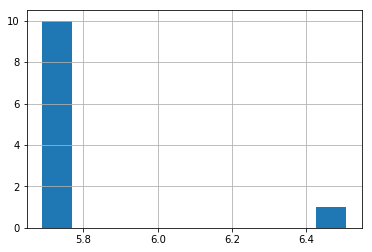

In [12]:
### the highest correlation
normal["46361 : hsa-miR-1278"].hist()

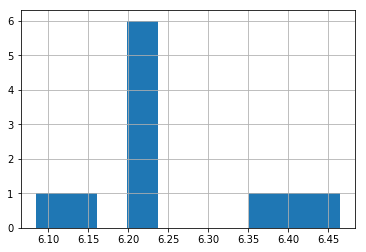

In [13]:
## the lowest correlation
normal["168626 : hsa-miR-4662a-5p"].hist()

In [15]:
## Cancer data
cancer= data[data.target==1]
cancer.describe()

,4040 : hsa-miR-9-5p,4610 : hsa-miR-126-3p,4700 : hsa-miR-140-5p,5250 : hsa-miR-105-5p,6880 : hsa-miR-297,9938 : hsa-let-7i-5p,10138 : hsa-miR-130a-3p,10306 : hsa-miR-146b-5p,10901 : hsa_negative_control_6,10902 : hsa_negative_control_7,10903 : hsa_negative_control_8,10916 : hsa-miR-1,10919 : hsa-miR-103a-3p,10923 : hsa-miR-107,10925 : hsa-miR-10b-5p,10928 : hsa-miR-125a-5p,10936 : hsa-miR-130b-3p,10937 : hsa-miR-132-3p,10943 : hsa-miR-136-5p,10946 : hsa-miR-141-3p,10947 : hsa-miR-142-3p,10952 : hsa-miR-146a-5p,10954 : hsa-miR-147a,10955 : hsa-miR-148a-3p,10964 : hsa-miR-155-5p,10967 : hsa-miR-16-5p,10972 : hsa-miR-181b-5p,10975 : hsa-miR-182-5p,10976 : hsa-miR-182-3p,10977 : hsa-miR-183-5p,10985 : hsa-miR-191-5p,10986 : hsa-miR-193a-3p,10987 : hsa-miR-193b-3p,10988 : hsa-miR-194-5p,10990 : hsa-miR-196a-5p,10995 : hsa-miR-199a-3p,10997 : hsa-miR-19a-3p,10998 : hsa-miR-19b-3p,11004 : hsa-miR-203,11005 : hsa-miR-204-5p,...,169372 : hsa-miR-5011-3p,169375 : hsa-miR-660-3p,169376 : hsa-miR-5701,169377 : hsa-miR-4715-3p,169378 : hsa-miR-4430,169379 : hsa-miR-4694-3p,169380 : hsa-miR-3124-3p,169381 : hsa-miR-4421,169382 : hsa-miR-4680-5p,169383 : hsa-miR-548ah-5p,169384 : hsa-miR-1295b-5p,169385 : hsa-miR-4500,169386 : hsa-miR-4427,169387 : hsa-miR-5703,169388 : hsa-miR-663a,169389 : hsa-miR-4717-3p,169390 : hsa-miR-4800-5p,169391 : hsa-miR-513a-3p,169393 : hsa-miR-4747-5p,169395 : hsa-miR-4484,169396 : hsa-miR-5700,169397 : hsa-miR-3184-5p,169398 : hsa-miR-5096,169399 : hsa-miR-4750,169402 : hsa-miR-625-3p,169404 : hsa-miR-3663-5p,169406 : hsa-miR-376b,169407 : hsa-miR-4301,169408 : hsa-miR-181d,169409 : hsa-miR-4286,169410 : hsa-miR-556-5p,169411 : hsa-miR-205-3p,169412 : hsa-miR-1260a,169414 : hsa-miR-525-5p,169415 : hsa-miR-187-5p,169416 : hsa-miRPlus-A1086,169417 : hsa-miR-551b-5p,169419 : hsa-miR-300,169420 : hsa-miR-193b-5p,target
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.0
mean,7.041076,7.569684,6.369854,6.519831,6.882039,7.394873,6.816057,7.003056,6.342573,6.265293,6.120085,6.574703,7.300853,6.949456,6.997311,7.841583,6.864288,6.140143,6.865210,8.230366,7.826525,6.603261,7.160446,6.540829,7.584475,7.824927,6.701494,6.605593,6.345791,6.603727,6.911349,7.120195,6.537447,6.345075,7.229913,6.901318,6.760110,6.599901,6.644725,7.045853,...,6.020742,11.274188,8.319719,6.132155,6.229331,6.584799,11.392246,8.222325,5.965208,5.973024,5.855183,7.031648,5.915698,6.018225,6.822133,6.087240,6.387751,5.813268,8.136602,6.775105,6.014861,6.142705,6.170842,11.036530,6.639551,6.334455,5.924051,7.580452,6.617979,7.946449,5.985570,6.904818,7.369521,6.046234,5.999167,6.195562,6.084277,5.864268,6.336533,1.0
std,0.283709,0.712436,0.312067,0.121731,0.177207,0.765839,0.434708,0.314582,0.094948,0.080372,0.070009,0.134819,0.349812,0.195175,0.335031,0.529614,0.099997,0.094131,0.190233,1.133981,0.758777,0.260204,0.396775,0.151642,0.232595,1.073554,0.209470,0.501584,0.095956,0.233250,0.609039,0.622730,0.349610,0.120283,0.403484,0.448365,0.177769,0.171852,0.173133,0.206161,...,0.051146,0.793515,1.057496,0.085849,0.171950,0.525595,0.885507,0.740477,0.043473,0.050163,0.035415,0.362392,0.042119,0.091744,0.654272,0.081168,0.337045,0.0

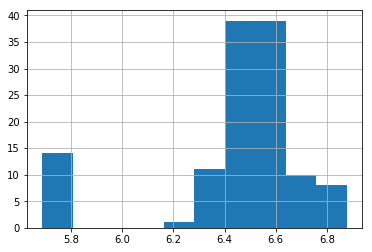

In [16]:
cancer["46361 : hsa-miR-1278"].hist()

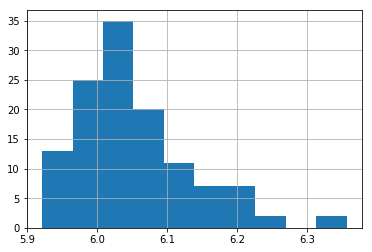

In [17]:
cancer["168626 : hsa-miR-4662a-5p"].hist()

In [18]:
### Normalization
X =data[data.columns[0:1926]] #independent columns
Y=data.iloc[:,1926] #target column i.e target
X= (X - np.min(X))/(np.max(X) - np.min(X))

## Modelling with SVM

In [19]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
clf = svm.SVC()
y_pred=clf.fit(X_train,Y_train).predict(X_test)

print("SVM score:", clf.score(X_test,Y_test))

SVM score: 0.9705882352941176


In [20]:
X_test.shape

(34, 1926)

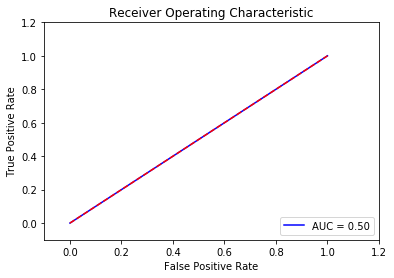

In [25]:
#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [29]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 0  1]
 [ 0 33]]

Accuracy is :
0.9705882352941176

Precision is :
0.9705882352941176

Recall is: 
1.0

F-score is: 
0.9850746268656716


## Modelling with Naive Bayes

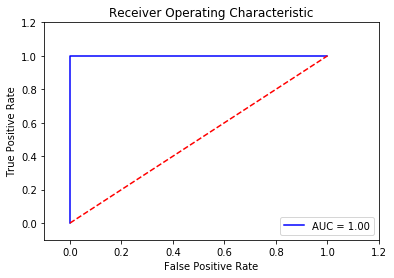

In [30]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
gnb = GaussianNB()
y_pred = gnb.fit(X_train,Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


In [32]:
print("Naive Bayes score:", gnb.score(X_test,Y_test))

Naive Bayes score: 1.0


## Modelling with KNN

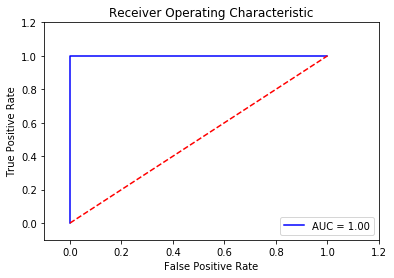

In [33]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
knn = KNeighborsClassifier(n_neighbors=5)
y_pred = knn.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [34]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 0 33]]

Accuracy is :
1.0

Precision is :
1.0

Recall is: 
1.0

F-score is: 
1.0


In [35]:
print("KNN score:", knn.score(X_test,Y_test))

KNN score: 1.0


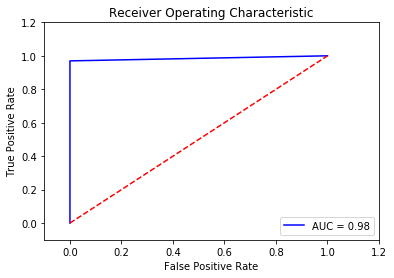

In [36]:
#Train and Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=1)

#Model and Training
knn = KNeighborsClassifier(n_neighbors=3)
y_pred = knn.fit(X_train, Y_train).predict(X_test)

#Model Evaluation
conf_mat = confusion_matrix(Y_test,y_pred)
acc = accuracy_score(Y_test,y_pred)
precision = precision_score(Y_test,y_pred)
recall = recall_score(Y_test,y_pred)
f1= f1_score(Y_test,y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
#Print Results
print('Confusion Matrix is :')
print(conf_mat)
print('\nAccuracy is :')
print(acc)
print('\nPrecision is :')
print(precision)
print('\nRecall is: ')
print(recall)
print('\nF-score is: ')
print(f1)

Confusion Matrix is :
[[ 1  0]
 [ 1 32]]

Accuracy is :
0.9705882352941176

Precision is :
1.0

Recall is: 
0.9696969696969697

F-score is: 
0.9846153846153847


## Submission

* Naive Bayes and KNN algorithms have perfect score for this dataset. 🎉
But if neighbors of k-value are equal to  number which is except 5, The accuracy of the algorithm is dropping. So the best neighbor is equal to 5.
* SVM is also good. But when we compare with KNN and Naive Bayes, the accuracy is lower as you can see.